## References

* HAT-P-14 b [(Fukui+16a))](http://iopscience.iop.org/article/10.3847/0004-637X/819/1/27/pdf)
* K2-3d [(Fukui+16b)](http://iopscience.iop.org/article/10.3847/0004-6256/152/6/171) 

In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'moscatel'

## import and parse csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import multiprocessing

bands='g,r,z_s'.split(',')
nstars=3


DF = {} #dict of dataframes
for band in bands:
    DF[band]=[]
    for band_idx,star_id in enumerate(range(nstars)):
        fname='data/phot_{0}band_star{1}.csv'.format(band,star_id)
        df = pd.read_csv(fname, parse_dates=True)
        df = df.set_index('mjd')
        DF[band].append(df)

In [4]:
DF.keys()

dict_keys(['g', 'r', 'z_s'])

## 3 bands one star

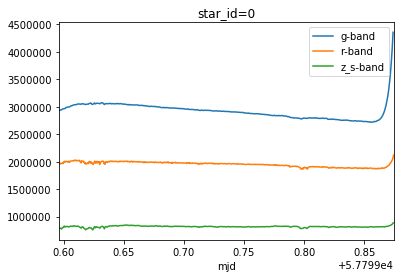

In [5]:
star_id=0

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

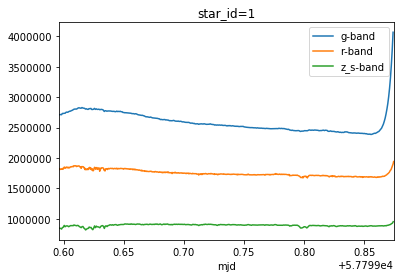

In [6]:
star_id=1

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

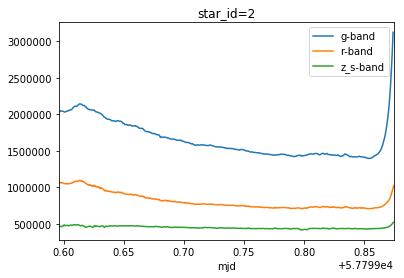

In [7]:
star_id=2

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

## 3 stars one band

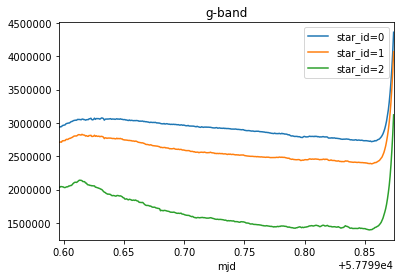

In [8]:
key='g'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

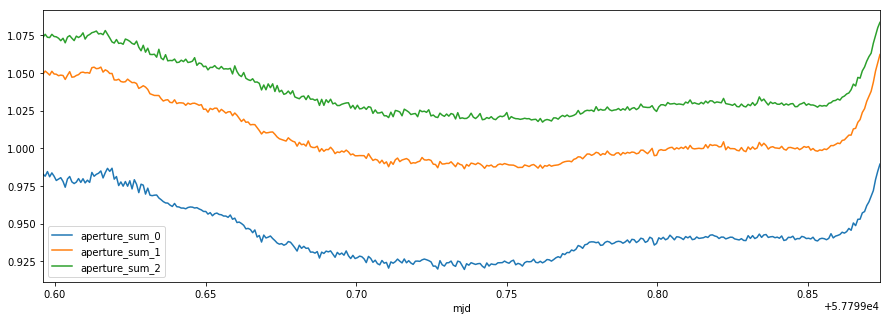

In [9]:
key='g'
param='aperture_sum_0,aperture_sum_1,aperture_sum_2'.split(',')

t=DF[key][0].index
target=DF[key][1][param]
ref=DF[key][0][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5))

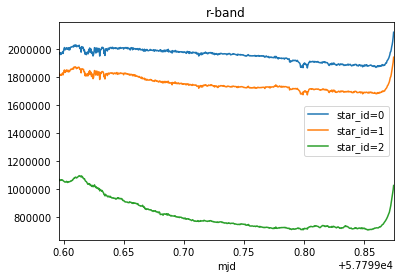

In [10]:
key='r'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

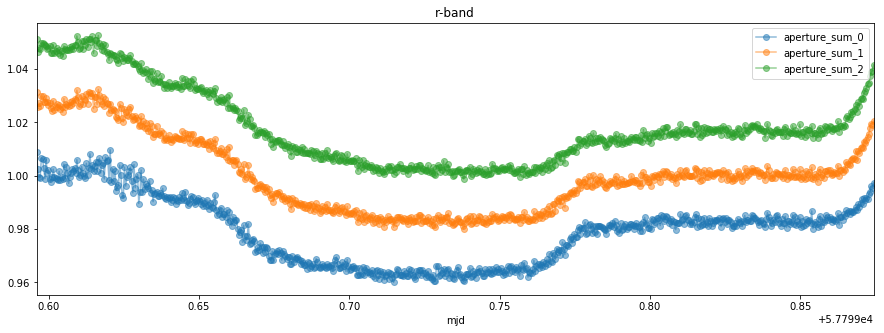

In [11]:
key='r'
param='aperture_sum_0,aperture_sum_1,aperture_sum_2'.split(',')

target_idx=1
ref_idx=0

t=DF[key][0].index
target=DF[key][target_idx][param]
ref=DF[key][ref_idx][param]
res=target/ref
res/=np.median(res)

title='{}-band'.format(key)
res.plot(figsize=(15,5), title=title, marker='o', alpha=0.5)

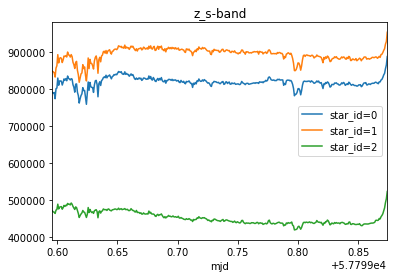

In [12]:
key='z_s'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

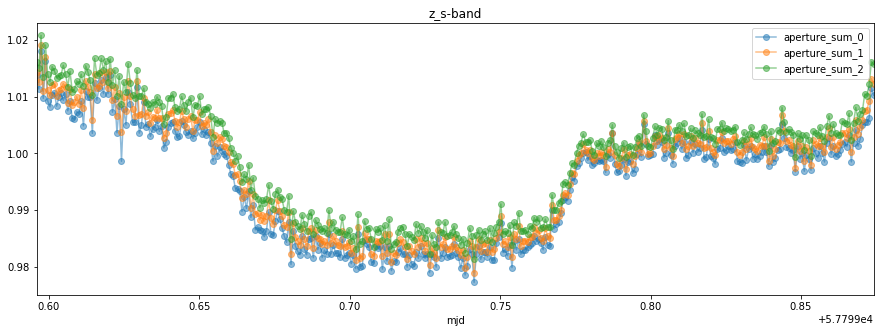

In [13]:
key='z_s'
param='aperture_sum_0,aperture_sum_1,aperture_sum_2'.split(',')

target_idx=0
ref_idx=1

t=DF[key][0].index
target=DF[key][target_idx][param]
ref=DF[key][ref_idx][param]
res=target/ref
res/=np.median(res)

title='{}-band'.format(key)
res.plot(figsize=(15,5), title=title, marker='o', alpha=0.5)

## centroids

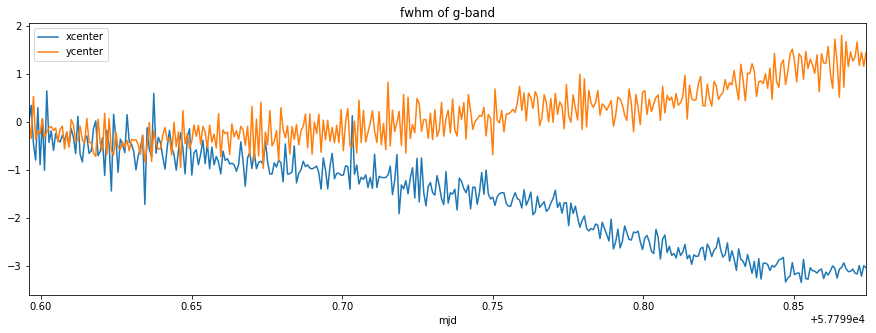

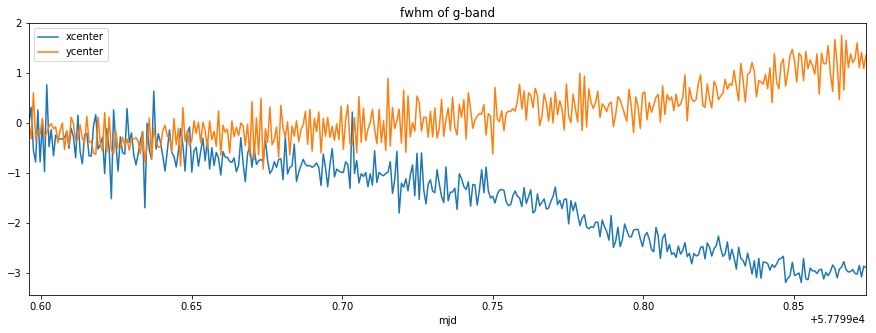

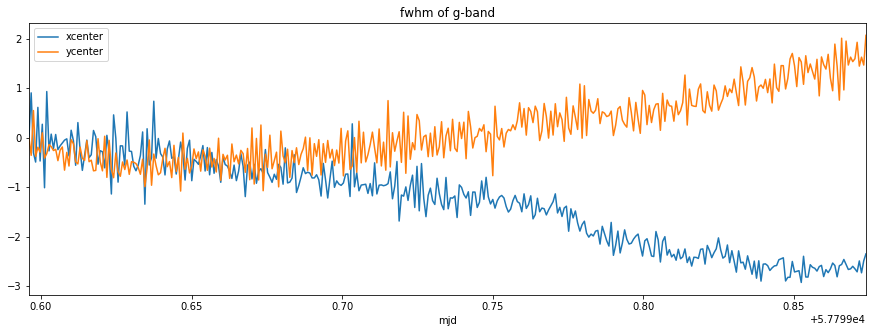

In [14]:
key='g'
param='xcenter,ycenter'.split(',')

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    #centroid with respect to the centroid at t=0
    shifted_centroids=DF[key][star_id][param]-DF[key][star_id][param].iloc[0]
    shifted_centroids.plot(label=label, title=title, figsize=(15,5))
plt.legend()

## peak flux within annulus

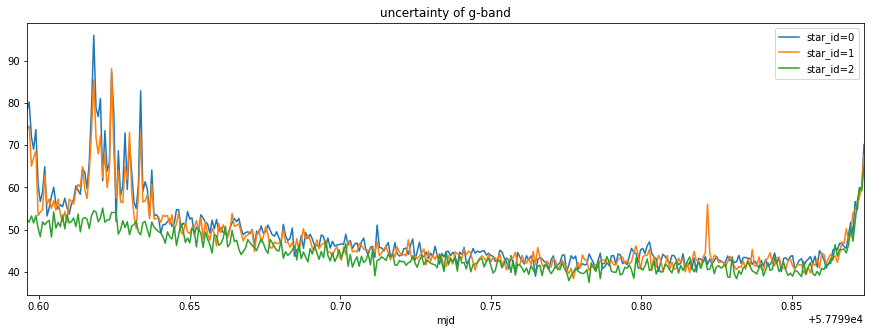

In [15]:
key='g'
param='uncertainty'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{0} of {1}-band'.format(param, key)
    DF[key][star_id][param].plot(label=label, title=title, figsize=(15,5))
plt.legend()

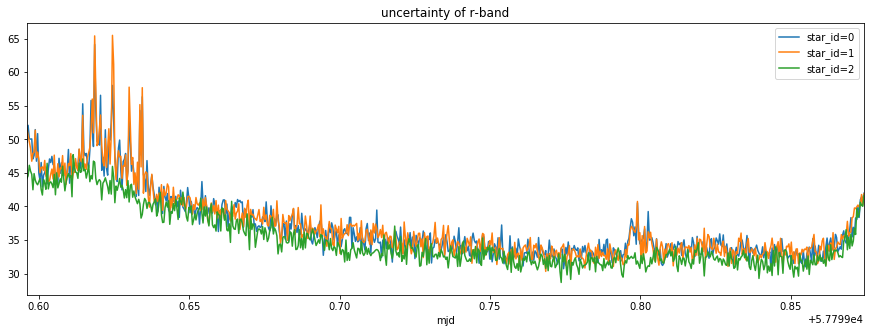

In [16]:
key='r'
param='uncertainty'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{0} of {1}-band'.format(param, key)
    DF[key][star_id][param].plot(label=label, title=title, figsize=(15,5))
plt.legend()

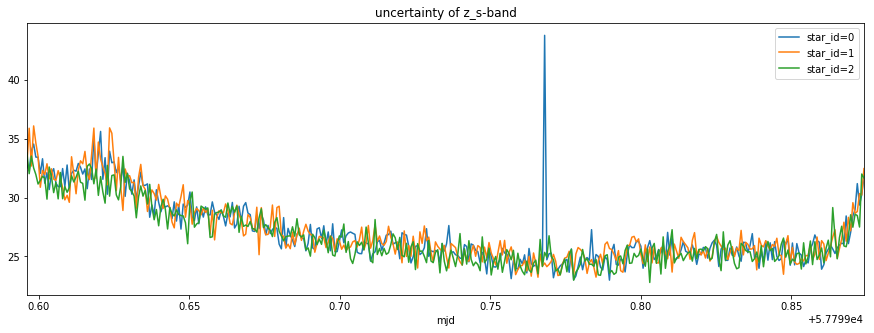

In [17]:
key='z_s'
param='uncertainty'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{0} of {1}-band'.format(param, key)
    DF[key][star_id][param].plot(label=label, title=title, figsize=(15,5))
plt.legend()

## fwhm

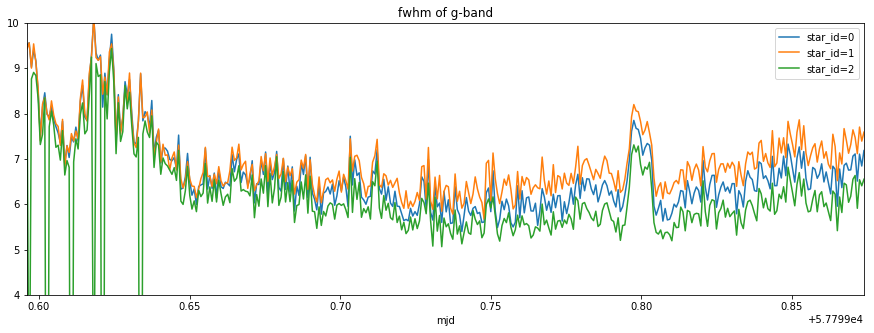

In [18]:
key='g'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

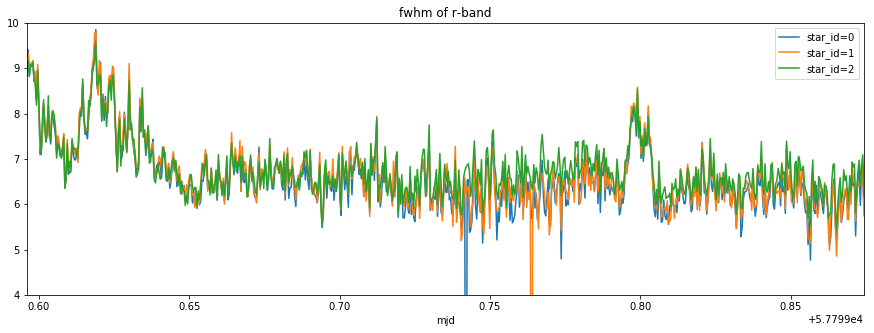

In [19]:
key='r'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

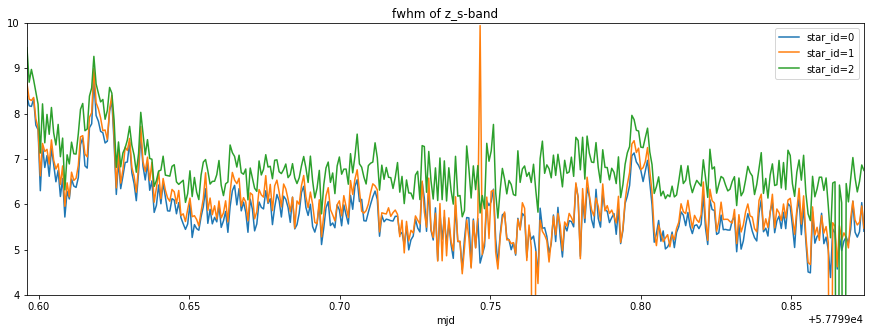

In [20]:
key='z_s'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

## best light curve

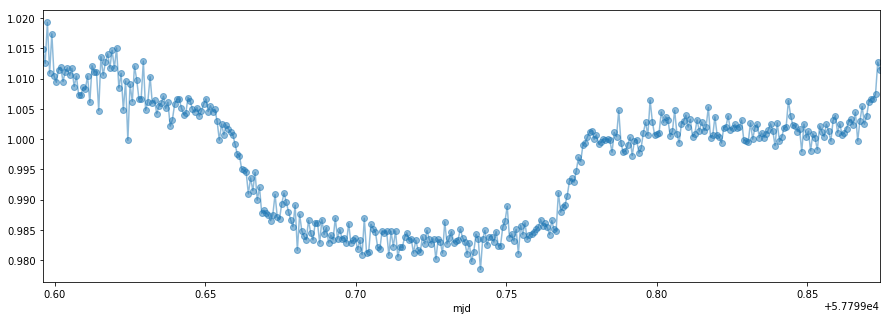

In [25]:
key='z_s'
param='aperture_sum_0'
target_idx = 0
ref_idx = 1

target=DF[key][target_idx][param]
ref=DF[key][ref_idx][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5), marker='o', alpha=0.5)

## MLE

* p, period
* k, r_planet/r_star
* t14, transit duration
* i, inclination
* b, impact paramter
* tc, mid-point transit time
* u1, u2, limb-darkening coeffs
* a_scaled

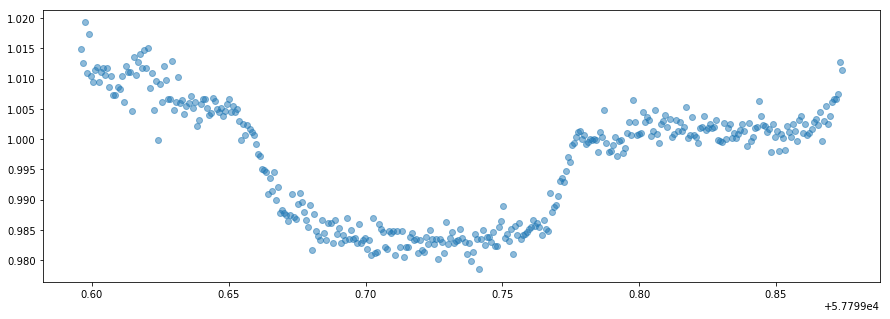

In [26]:
df_z=DF[key][target_idx]

#clip the right side of baseline
clip=40
#df_z=df_z[:-clip]

t=df_z.index.values
f=res.values

fig = plt.figure(figsize=(15,5))
plt.plot(t, f, 'o', alpha=0.5)

In [27]:
def scaled_a(p, t14, k, i=np.pi/2, b=0):
    numer = np.sqrt( (k + 1)**2 - b**2 )
    denom = np.sin(i) * np.sin(t14 * np.pi / p)
    return float(numer / denom)

tc = t.mean()
p = 4.3
k = np.sqrt(0.015)
i = np.pi/2
t14 = 2.8/24
u1 = 0.4
u2 = 0.4
a = scaled_a(p, t14, k, i=np.pi/2)
# ls = np.log(f.std())
# k0 = 0
# theta = [k,tc,a,i,u1,u2,ls,k0]
theta = [k,tc,a,i,u1,u2]
print ("initial guess: {}".format(theta))

initial guess: [0.1224744871391589, 57799.735050636424, 13.18482235546915, 1.5707963267948966, 0.4, 0.4]


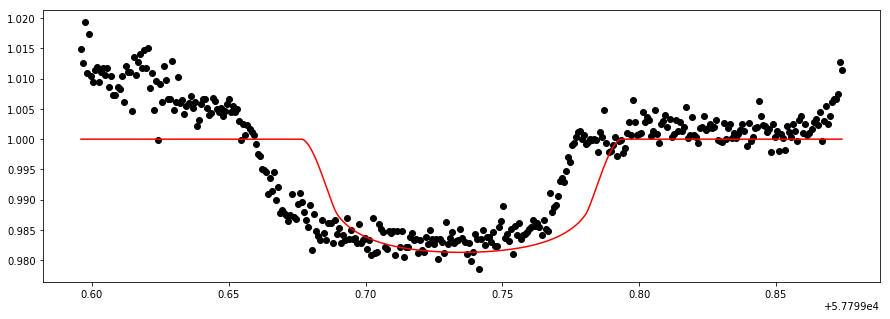

In [28]:
from pytransit import MandelAgol
MA = MandelAgol()

def model_u(theta, t, p):
    k,tc,a,i,u1,u2 = theta
    m = MA.evaluate(t, k, (u1, u2), tc, p, a, i)
    return m

fig = plt.figure(figsize=(15,5))
plt.plot(t, f, 'ko', t, model_u(theta, t, p), 'r-')

In [29]:
import scipy.optimize as op

def obj(theta, t, p, f):
    m = model_u(theta, t, p)
    return np.sum((m-f)**2)

print ("cost before: {}".format(obj(theta, t, p, f)))
res = op.minimize(obj, theta, args=(t, p, f), method='nelder-mead')
print ("cost after: {}".format(obj(res.x, t, p, f)))

cost before: 0.015076031146712144
cost after: 0.009015670568175356


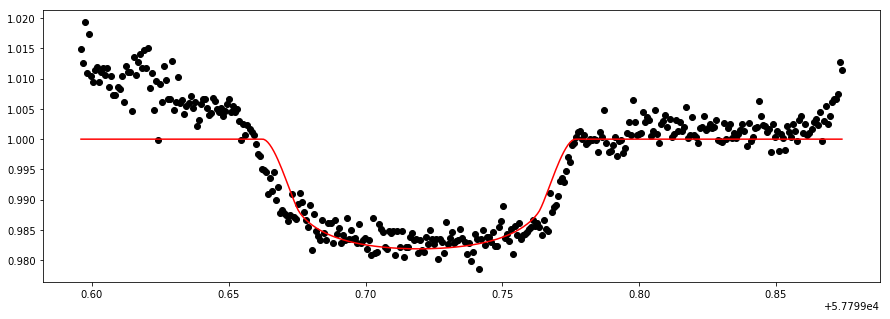

In [30]:
fig = plt.figure(figsize=(15,5))
plt.plot(t, f, 'ko', t, model_u(res.x, t, p), 'r-')

In [31]:
DF[key][target_idx].columns

Index(['aperture_sum_0', 'aperture_sum_1', 'aperture_sum_2',
       'aperture_sum_err_0', 'aperture_sum_err_1', 'aperture_sum_err_2', 'bkg',
       'fwhm', 'id', 'peak_flux', 'uncertainty', 'xcenter', 'ycenter'],
      dtype='object')

In [35]:
uncertainty=DF[key][target_idx]['uncertainty']
peak_flux=DF[key][target_idx]['peak_flux']
fwhm = DF[key][target_idx]['fwhm']
xcenter = DF[key][target_idx]['xcenter']
ycenter = DF[key][target_idx]['ycenter']

In [33]:
np.c_[fwhm, xcenter, ycenter].shape

(376, 3)

### Systematics Model

In [36]:
#systematics parameters
k0, k1, k2, k3, k4 = [0]*5
#log flux uncertainty
ls = np.log(f.std())

#parameters vector: 6 free, 7 input
theta = [k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4]

#systematics model (time-dependent)
def model_s(theta, fwhm, uncertainty, xcenter, ycenter, t):
    #functional form of systematics model
    dummy = np.ones(len(fwhm))
    s = (np.array(theta)*np.c_[fwhm, xcenter, ycenter, uncertainty, t]).sum(axis=1)
    # unpack 6 free params
    #a,b,c,d,e = theta
    #s = a + b*t + c*fwhm + d*xcenter + e*ycenter
    return s

def loglike(theta, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_mod=False, ret_sys=False, ret_full = False):
    ls = theta[6]
    m = model_u(theta[:6], t, p)
    s = model_s(theta[7:], fwhm, uncertainty, xcenter, ycenter, t) # #add sys model
    
    if ret_mod:
        return m
    if ret_sys:
        return s
    if ret_full:
        return m+s
    
    resid = f - m - s
    
    inv_sig2 = np.exp(-2*ls)
    
    return -0.5*(np.sum((resid)**2 * inv_sig2 + 2*ls))

nll = lambda *x: -loglike(*x)

print ("NLL before: {}".format(nll(theta, t, f, p, fwhm, uncertainty, xcenter, ycenter)))
res = op.minimize(nll, theta, args=(t, f, p, fwhm, uncertainty, xcenter, ycenter), method='powell')
print ("NLL after: {}".format(nll(res.x, t, f, p, fwhm, uncertainty, xcenter, ycenter)))

NLL before: -1656.431422590912
NLL after: -1537.9050597886549


In [39]:
%timeit model_s(range(5), fwhm, uncertainty, xcenter, ycenter, t)

233 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit model_u(theta[:6], t, p)

112 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


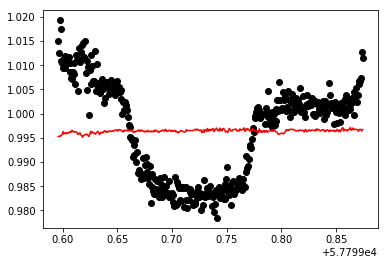

In [41]:
plt.plot(t, f, 'ko', t, loglike(res.x, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_full=True), 'r-')

## Maximum A Priori Estimation

In [42]:
def logprob(theta, t, f, p, fwhm, uncertainty, xcenter, ycenter, up=None):

    k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4 = theta

    if u1 < 0 or u1 > 2 or u2 < -1 or u2 > 1 or k < 0 or k > 1 or i > np.pi/2:
        return -np.inf

    lp = 0
    if up is not None:
        lp += np.log(stats.norm.pdf(u1, loc=up[0], scale=up[1]))
        lp += np.log(stats.norm.pdf(u2, loc=up[2], scale=up[3]))

    ll = loglike(theta, t, f, p, fwhm, uncertainty, xcenter, ycenter)

    if np.isnan(ll).any():
        return -np.inf
    
    return lp + ll


nlp = lambda *x: -logprob(*x)

print ("NLP before: {}".format(nlp(theta, t, f, p, fwhm, uncertainty, xcenter, ycenter)))
res = op.minimize(nlp, theta, args=(t, p, f, fwhm, uncertainty, xcenter, ycenter), method='nelder-mead')
print ("NLP after: {}".format(nlp(res.x, t, f, p, fwhm, uncertainty, xcenter, ycenter)))

NLP before: -1656.431422590912
NLP after: 1621806982.859641


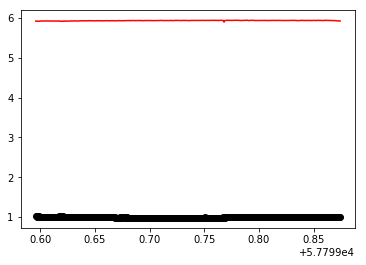

In [43]:
plt.plot(t, f, 'ko', t, loglike(res.x, t, f, p, fwhm, xcenter, uncertainty, ycenter, ret_full=True), 'r-')

## MCMC

In [44]:
from emcee import MHSampler, EnsembleSampler
from emcee.utils import sample_ball
from tqdm import tqdm

ndim = len(theta)
nwalkers = 8 * ndim if ndim > 12 else 16 * ndim
nsteps1 = 1000

args = t, f, p, fwhm, uncertainty, xcenter, ycenter
sampler = EnsembleSampler(nwalkers, ndim, logprob,
    args=args, threads=1)

#random initial condition
pos0 = sample_ball(theta, [1e-4]*ndim, nwalkers)

#begin
for pos,_,_ in tqdm(sampler.sample(pos0, iterations=nsteps1)):
    pass

0it [00:00, ?it/s]/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
1000it [02:14,  7.78it/s]


## Parameter best estimates

In [45]:
for i,j in zip(theta, sampler.flatchain.mean(axis=0)): 
    print(i,j)

0.122474487139 0.126563838409
57799.7350506 57799.7189137
13.18482235546915 12.5949094609
1.5707963267948966 1.55862806755
0.4 0.405962453284
0.4 0.0402197241666
-4.6063591491 -5.41219019512
0 0.000901543092319
0 -0.00174421594692
0 9.92883670156e-05
0 0.000435702417509
0 2.69907160141e-05


In [46]:
sampler.flatlnprobability.shape

(192000,)

In [47]:
#12 params
sampler.flatchain.shape 

(192000, 12)

In [48]:
sampler.flatlnprobability.max()

2119.2321176590995

In [49]:
max_idx=np.argmax(sampler.flatlnprobability)

In [50]:
#parameter vector
pv=sampler.flatchain[max_idx]
pv

array([  1.28542343e-01,   5.77997165e+04,   1.21934523e+01,
         1.56440453e+00,   6.84957912e-01,  -4.52585374e-01,
        -6.12702545e+00,   1.01006471e-03,  -1.30612711e-03,
        -8.20725022e-05,   5.85694139e-04,   2.06318913e-05])

## Initial results

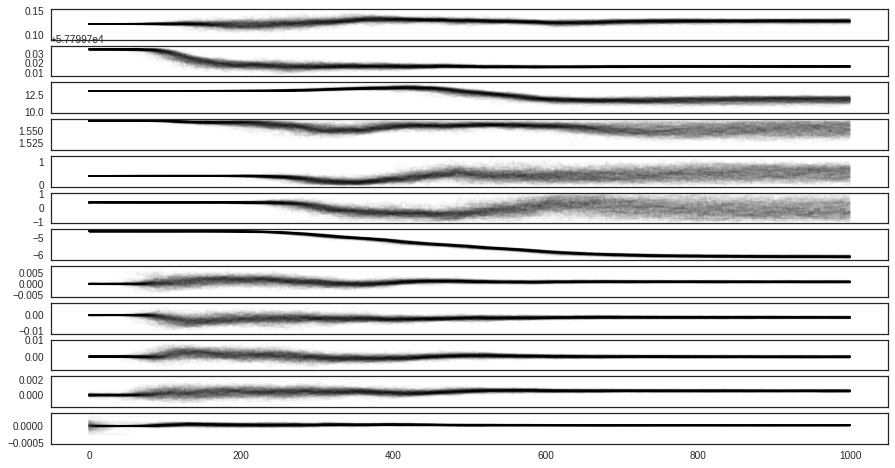

In [51]:
import seaborn as sb

chain = sampler.chain

with sb.axes_style('white'):
    nwalkers, nsteps, ndim = chain.shape
    fig, axs = plt.subplots(ndim, 1, figsize=(15,ndim/1.5), sharex=True)
    [axs.flat[i].plot(c, drawstyle='steps', color='k', alpha=4./nwalkers) for i,c in enumerate(chain.T)]
    #ax.set_ylim()

Monitor the [Gelman-Rubin statistic]() to ensure high quality posterior samples for the chains produced by the MCMC sampler 

* stabilize below a typical value of at most 1.03 up to a maximum of N steps for each of the N walkers
* cull the final chain using the burn-in value of N and thinning by a factor of 10 to account for autocorrelation in samples
* the final flattened chains thus consist of approximately X independent posterior samples

In [52]:
burn = 500

In [53]:
#nwalkers, nsteps, ndim
sampler.chain.shape

(192, 1000, 12)

In [54]:
#burn-in phase removed
sampler.chain[:,burn:,:].shape

(192, 500, 12)

## Reset sampler excluding burn-in phase

In [55]:
sampler.reset()
for pos,_,_ in tqdm(sampler.sample(pos, iterations=nsteps1)):
    pass

1000it [02:20,  4.10it/s]


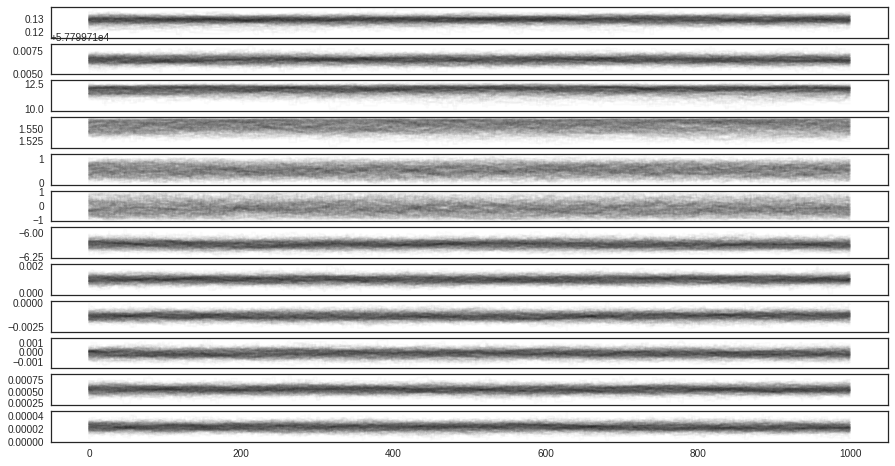

In [56]:
import seaborn as sb

chain = sampler.chain

with sb.axes_style('white'):
    nwalkers, nsteps, ndim = chain.shape
    fig, axs = plt.subplots(ndim, 1, figsize=(15,ndim/1.5), sharex=True)
    [axs.flat[i].plot(c, drawstyle='steps', color='k', alpha=4./nwalkers) for i,c in enumerate(chain.T)]
    #ax.set_ylim()

Doesn't look more stable than burn-in stage before.

## Results

In [57]:
sampler.chain[:,burn:,:].reshape(-1, ndim).shape

(96000, 12)

In [58]:
#flat chain
fc=sampler.chain[:,burn:,:].reshape(-1, ndim)

In [59]:
#posteriors: draw 100 random from fc
mod_sys = [loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_full=True) for th in fc[np.random.randint(0, fc.shape[0], size=100)]]
sys = [loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_sys=True) for th in fc[np.random.randint(0, fc.shape[0], size=100)]]
mod = [loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_mod=True) for th in fc[np.random.randint(0, fc.shape[0], size=100)]]

### systematics only

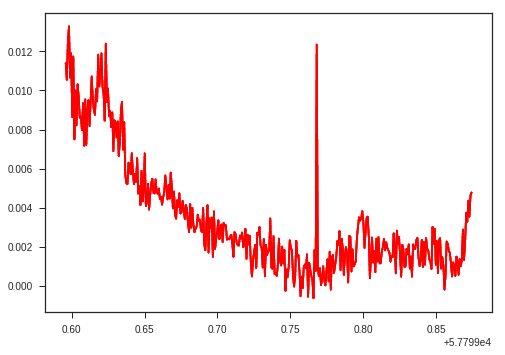

In [60]:
import seaborn as sb
with sb.axes_style('ticks'):
    for s in sys:
        plt.plot(t, s, 'r-', alpha=0.03)

### data - systematics

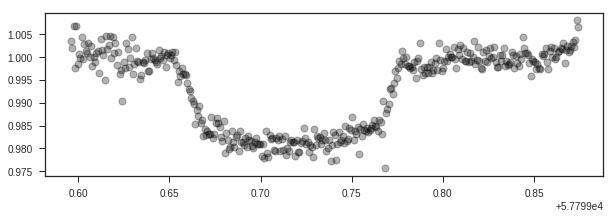

In [61]:
with sb.axes_style('ticks'):
    fig, ax = plt.subplots(1, 1, figsize=(10,3))
    ax.plot(t, f-sys[0], linestyle='none', marker='o',
        color='k', alpha=0.3, mew=1, mec='k')

### model + systematics

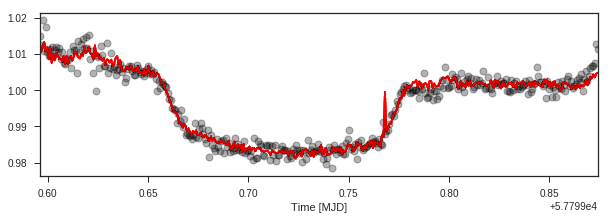

In [62]:
#posterior
ps = [loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_full=True) for th in fc[np.random.randint(0, fc.shape[0], size=100)]]

with sb.axes_style('ticks'):
    fig, ax = plt.subplots(1, 1, figsize=(10,3))
    ax.plot(t, f, linestyle='none', marker='o',
        color='k', alpha=0.3, mew=1, mec='k')
    for s in ps:
        ax.plot(t, s, 'r-', alpha=0.03)
    plt.setp(ax, xlabel='Time [MJD]', xlim=(t.min(), t.max()))

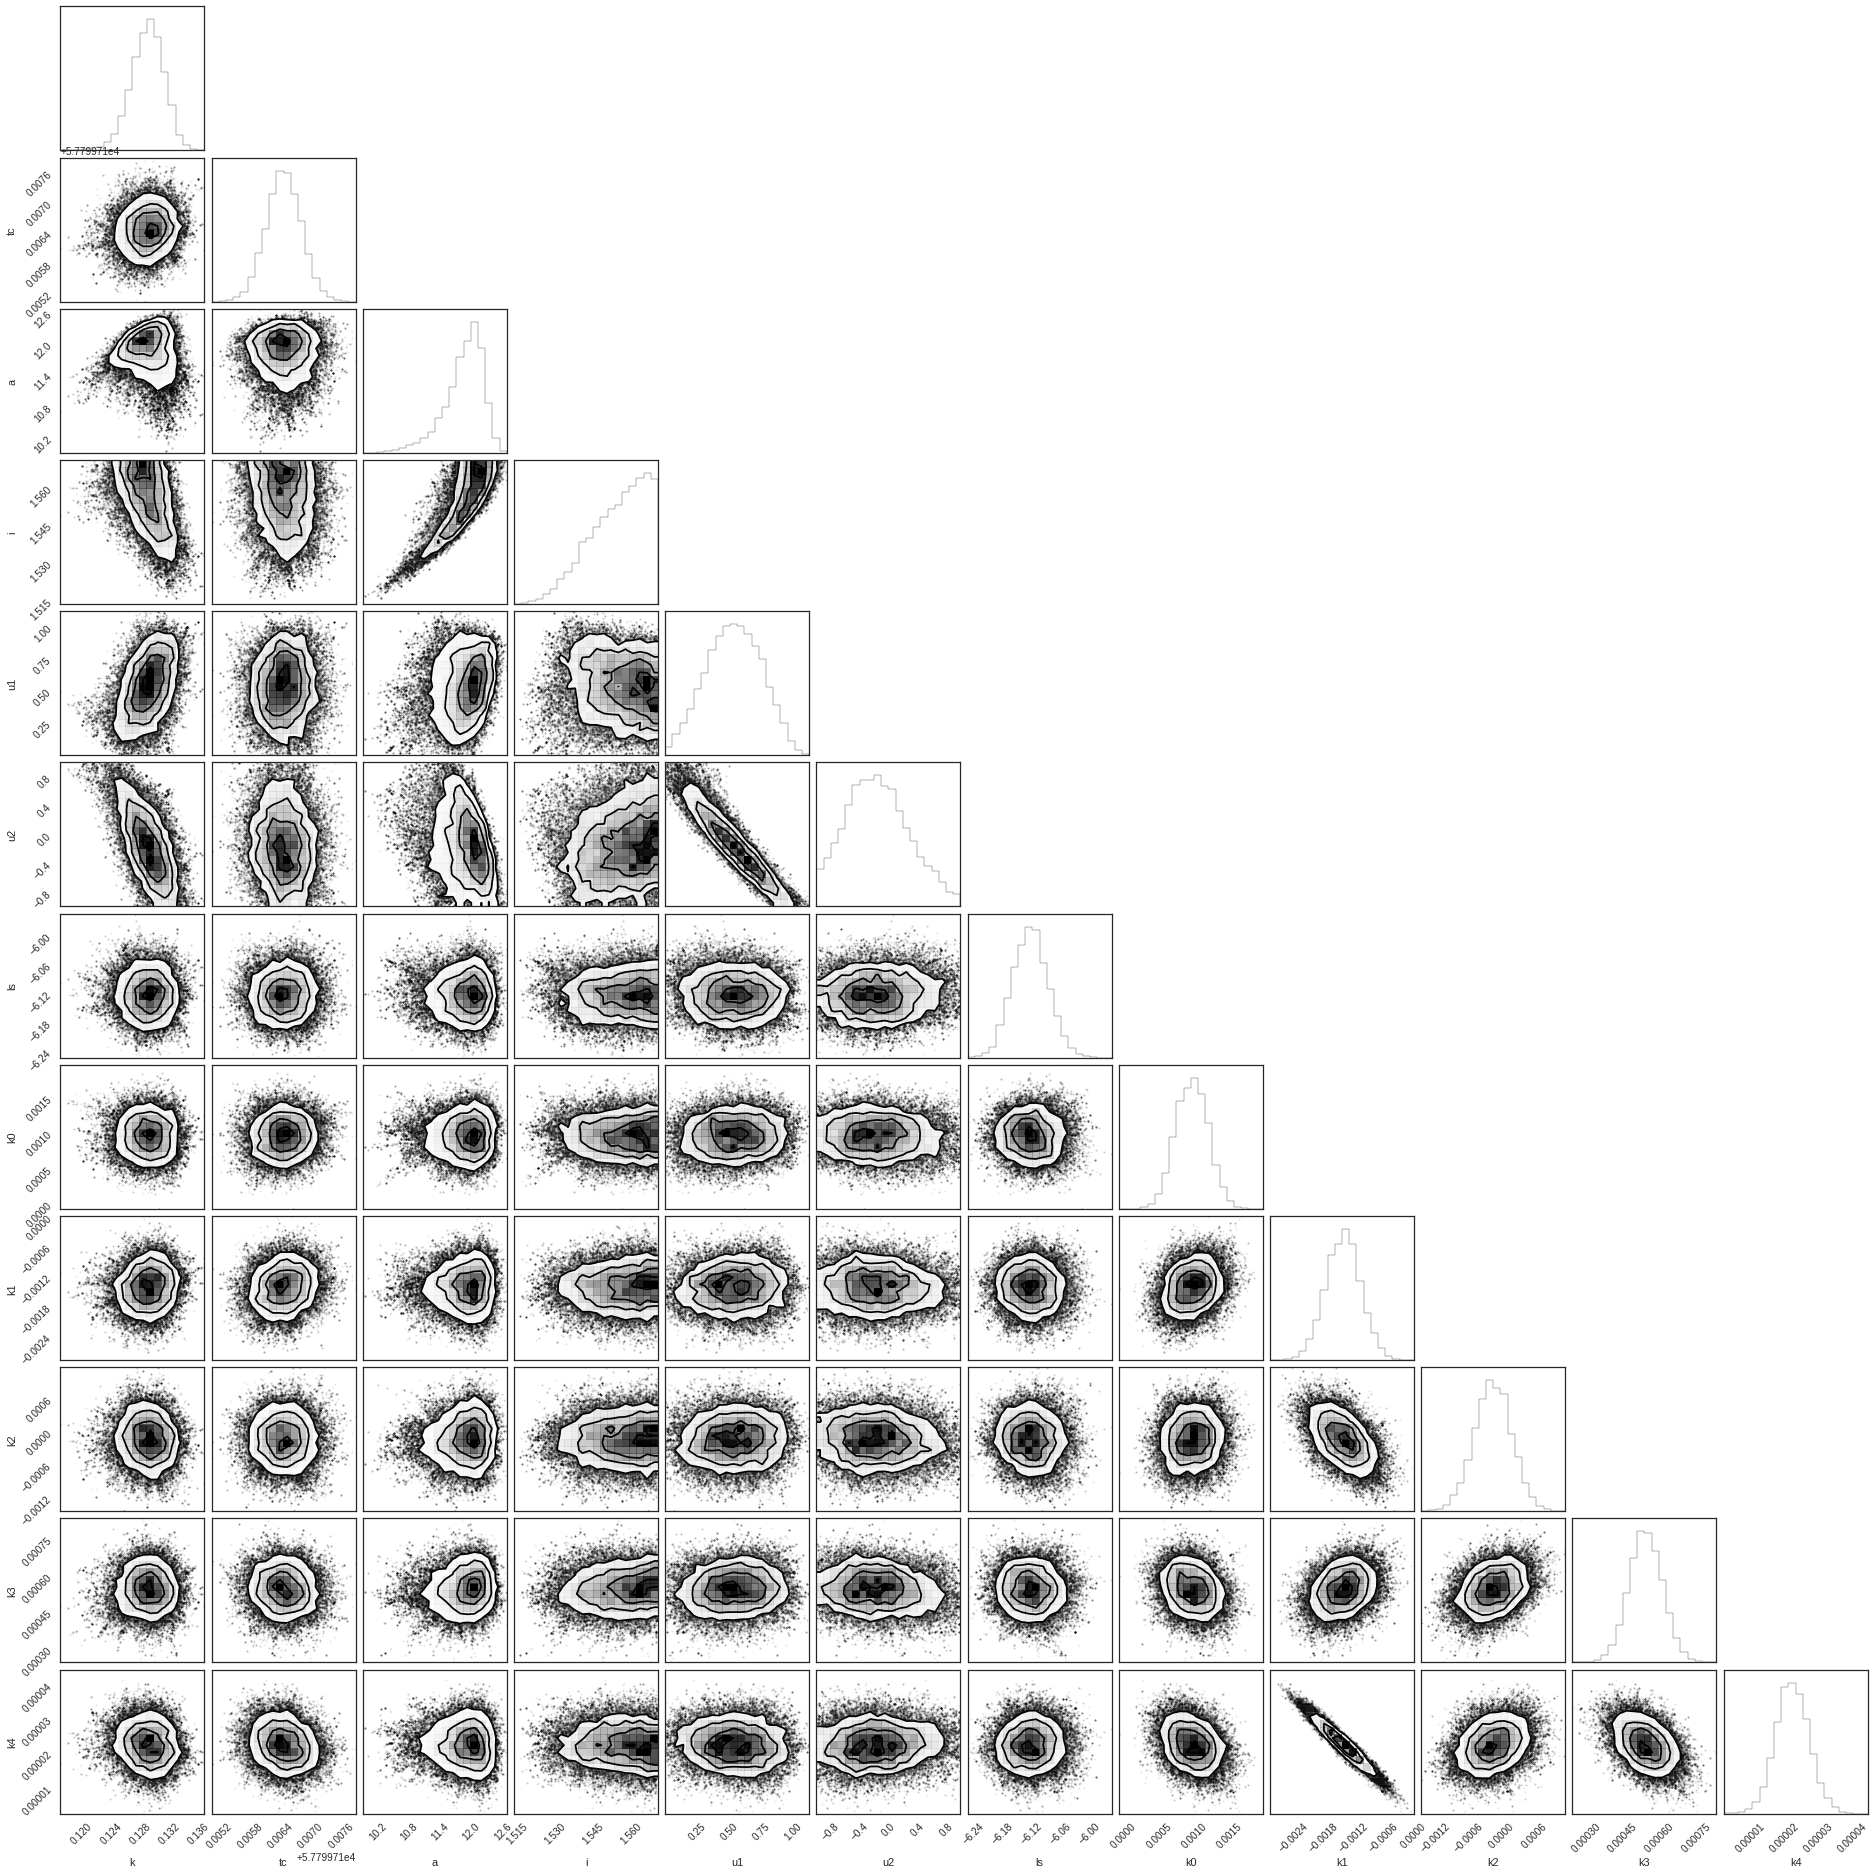

In [63]:
import corner
with sb.axes_style('white'):
    corner.corner(fc, labels='k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4'.split(','), fontsize=20)

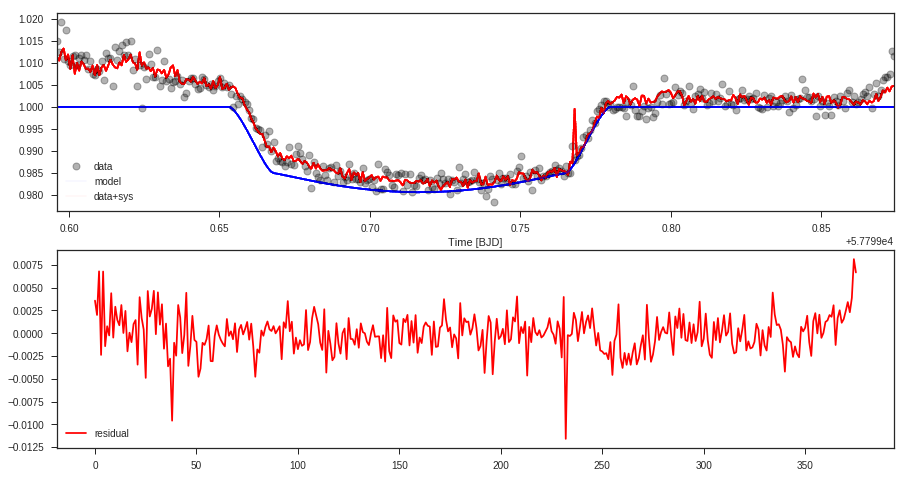

In [64]:
with sb.axes_style('ticks'):
    fig, ax = plt.subplots(2, 1, figsize=(15,8))
    #data
    ax[0].plot(t, f, linestyle='none', marker='o',
        color='k', alpha=0.3, mew=1, mec='k')
    for s in ps:
        #model
        ax[0].plot(t, loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_mod=True), 
                   'b-', alpha=0.03) 
        #model+systematics
        ax[0].plot(t, s, 'r-', alpha=0.03)
    #residual
    res = loglike(pv, t, f, p, fwhm, uncertainty, xcenter, ycenter, ret_full=True)
    ax[1].plot(f-res, 'r-', label='residual')
    plt.setp(ax[0], xlabel='Time [BJD]',
        xlim=(t.min(), t.max()))
ax[0].legend(['data','model','data+sys'], loc='lower left')
ax[1].legend(loc='best')

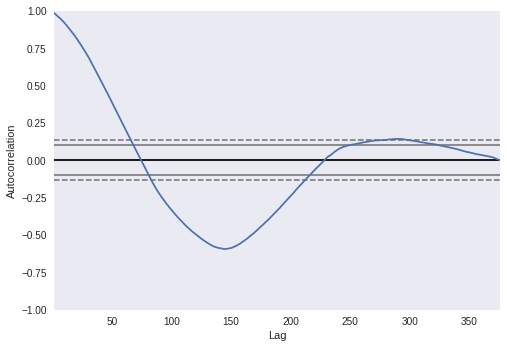

In [65]:
from pandas.tools.plotting import autocorrelation_plot

plt.figure()
autocorrelation_plot(res)

## To Do:

* optimize photometry for better g and r-band light curves
* fix tapses in fwhm estimation
* simplify systematics model